## Linear Regression Practical implementation

In [1]:
from sklearn.datasets import fetch_california_housing

In [2]:
dataset=fetch_california_housing()

In [3]:
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [4]:
dataset.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [5]:
dataset.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [6]:
import pandas as pd

In [7]:
df=pd.DataFrame(dataset.data,columns=dataset.feature_names)

In [8]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [9]:
df['Price']=dataset.target

In [10]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [11]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [12]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [13]:
import seaborn as sns

In [14]:
df_copy=df.sample(frac=0.25)

In [17]:
df_copy.shape

(5160, 9)

C:\Users\niced\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\niced\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\niced\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\niced\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

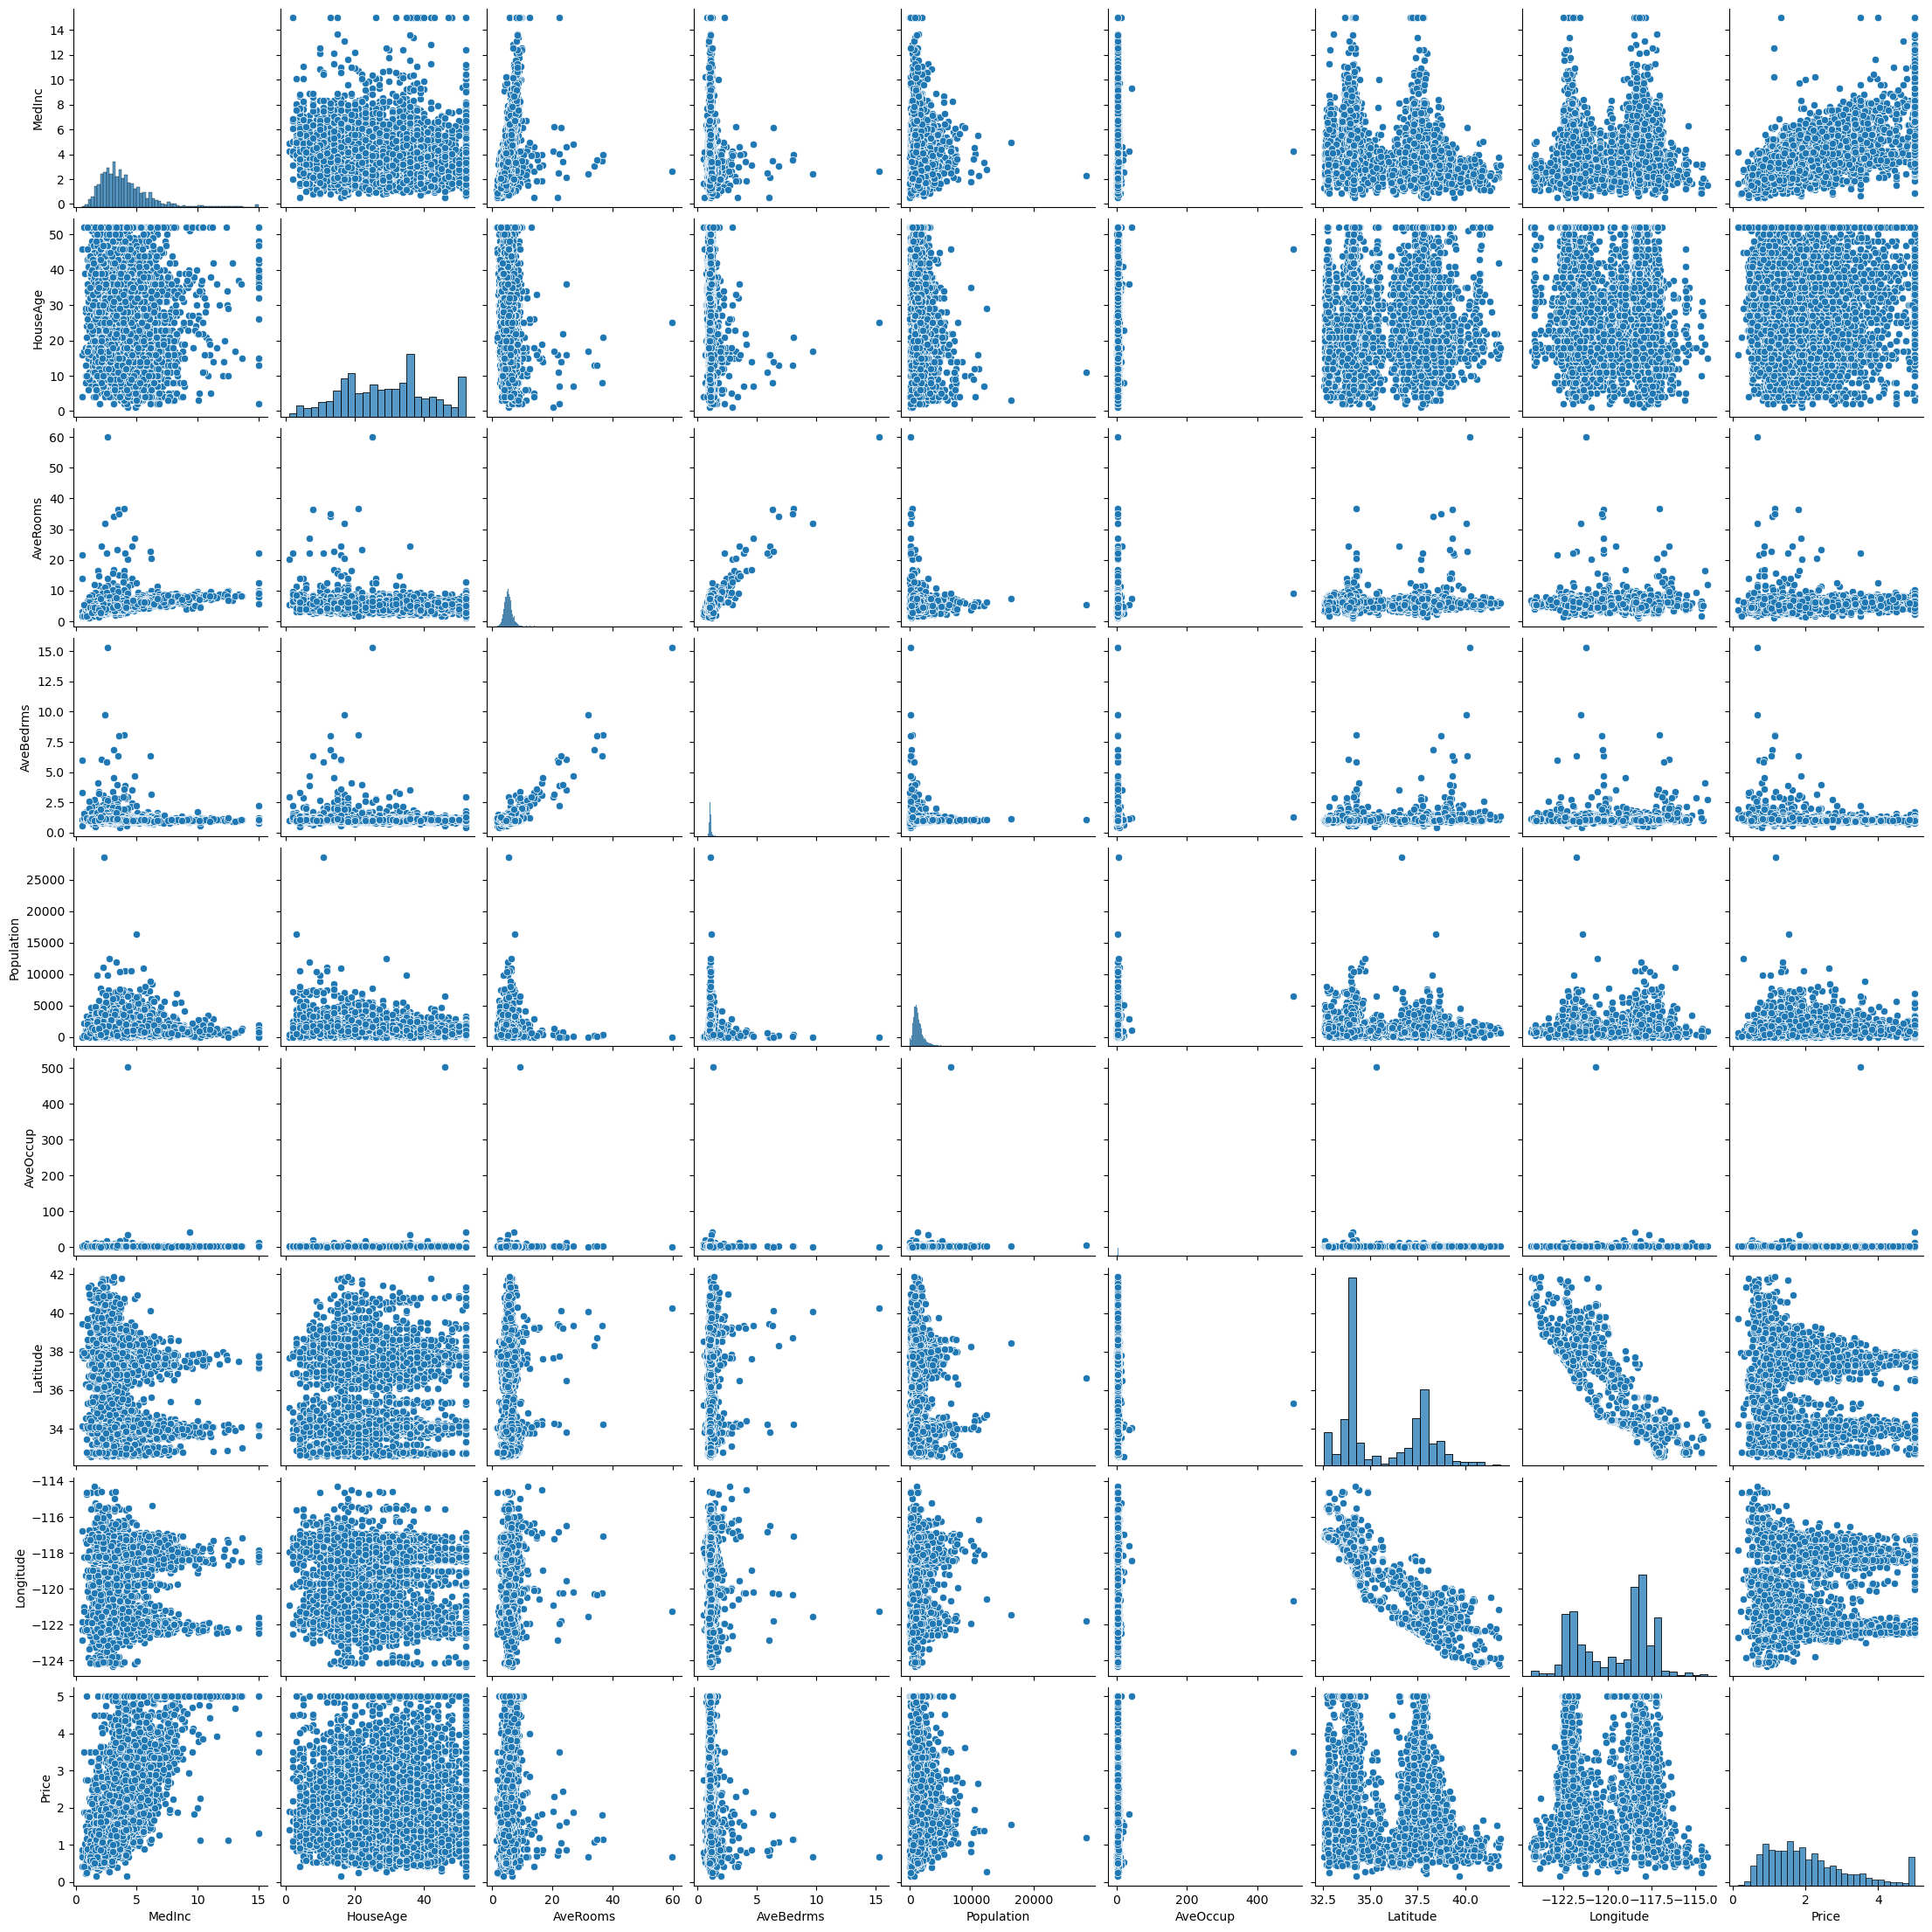

In [18]:
sns.pairplot(df_copy)

In [ ]:
#Divide the dataset into independent and dependent feature
#Divide the dataset into TRAIN and TEST
#Feature Scaling--Standardization
#Model Training

In [19]:
#Divide the dataset into independent and dependent feature

In [20]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [21]:
#Divide the dataset into TRAIN and TEST

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.33,random_state=42)

In [27]:
X_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
5088,0.9809,19.0,3.187726,1.129964,726.0,2.620939,33.98,-118.28
17096,4.2232,33.0,6.189696,1.086651,1015.0,2.377049,37.46,-122.23
5617,3.5488,42.0,4.821577,1.095436,1044.0,4.331950,33.79,-118.26
20060,1.6469,24.0,4.274194,1.048387,1686.0,4.532258,35.87,-119.26
895,3.9909,14.0,4.608303,1.089350,2738.0,2.471119,37.54,-121.96


In [28]:
X.shape

(20640, 8)

In [29]:
X_train.shape,X_test.shape

((13828, 8), (6812, 8))

In [30]:
#Feature Scaling--Standardization

In [31]:
from sklearn.preprocessing  import StandardScaler
scaler=StandardScaler()

In [32]:
scaler.fit(X_train)

StandardScaler()

In [33]:
scaler.transform(X_train)

array([[-1.52169954, -0.75868455, -0.91813082, ..., -0.04014979,
        -0.78315293,  0.65090402],
       [ 0.18205382,  0.3523991 ,  0.30748451, ..., -0.05943619,
         0.8475975 , -1.31911678],
       [-0.17232772,  1.06666717, -0.25107784, ...,  0.09515433,
        -0.87218816,  0.66087881],
       ...,
       [-0.49518065,  0.59048846, -0.59192622, ...,  0.01608523,
        -0.75972261,  0.60103008],
       [ 0.96816708, -1.07613702,  0.39144665, ...,  0.0039722 ,
         0.90383028, -1.18445713],
       [-0.68377427,  1.86029835, -0.83041358, ..., -0.08065717,
         0.9928655 , -1.41387727]])

In [34]:
X_train=scaler.fit_transform(X_train)

In [35]:
X_train

array([[-1.52169954, -0.75868455, -0.91813082, ..., -0.04014979,
        -0.78315293,  0.65090402],
       [ 0.18205382,  0.3523991 ,  0.30748451, ..., -0.05943619,
         0.8475975 , -1.31911678],
       [-0.17232772,  1.06666717, -0.25107784, ...,  0.09515433,
        -0.87218816,  0.66087881],
       ...,
       [-0.49518065,  0.59048846, -0.59192622, ...,  0.01608523,
        -0.75972261,  0.60103008],
       [ 0.96816708, -1.07613702,  0.39144665, ...,  0.0039722 ,
         0.90383028, -1.18445713],
       [-0.68377427,  1.86029835, -0.83041358, ..., -0.08065717,
         0.9928655 , -1.41387727]])

In [36]:
X_test=scaler.transform(X_test)

In [37]:
#Model Training

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
regression=LinearRegression()

In [40]:
regression.fit(X_train,Y_train)

LinearRegression()

In [41]:
regression.coef_

array([ 8.46603472e-01,  1.20333548e-01, -2.98800785e-01,  3.47243173e-01,
       -8.81413334e-05, -4.17242067e-02, -8.94420371e-01, -8.70401317e-01])

In [42]:
regression.intercept_

2.0666362048018536

In [44]:
## Prediction
y_pred=regression.predict(X_test)

In [49]:
import numpy as np
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [50]:
mse=mean_squared_error(Y_test,y_pred)
print(f"Mean squared error is {mse}")
mae=mean_absolute_error(Y_test,y_pred)
print(f"Mean Absolute error is {mae}")
print(f"Root Mean squared Error is {np.sqrt(mse)}")

Mean squared error is 0.5369686543372459
Mean Absolute error is 0.5295710106684453
Root Mean squared Error is 0.7327814505957735


In [51]:
#Accuracy
from sklearn.metrics import r2_score

In [53]:
score=r2_score(Y_test,y_pred)

In [54]:
score

0.5970494128783952

In [56]:
# Adjusted r_square
1-(1-score)*(len(Y)-1)/(len(Y)-X.shape[1]-1)

0.5968931623477872

# Ridge Regression

In [57]:
from sklearn.linear_model import Ridge

In [62]:
ridge=Ridge(alpha=10)
ridge.fit(X_train,Y_train)

Ridge(alpha=10)

In [63]:
y_pred=ridge.predict(X_test)

In [64]:
mse=mean_squared_error(Y_test,y_pred)
print(f"Mean squared error is {mse}")
mae=mean_absolute_error(Y_test,y_pred)
print(f"Mean Absolute error is {mae}")
print(f"Root Mean squared Error is {np.sqrt(mse)}")

Mean squared error is 0.536752799648305
Mean Absolute error is 0.5295394602988547
Root Mean squared Error is 0.7326341512981122


# Lasso Regression

In [65]:
from sklearn.linear_model import Lasso

In [66]:
lasso=Lasso()

In [67]:
lasso.fit(X_train,Y_train)

Lasso()

In [71]:
y_pred=lasso.predict(X_test)

In [72]:
mse=mean_squared_error(Y_test,y_pred)
print(f"Mean squared error is {mse}")
mae=mean_absolute_error(Y_test,y_pred)
print(f"Mean Absolute error is {mae}")
print(f"Root Mean squared Error is {np.sqrt(mse)}")

Mean squared error is 1.3326257277946882
Mean Absolute error is 0.9126511897647483
Root Mean squared Error is 1.15439409553007


# ElasticNet

In [73]:
from sklearn.linear_model import ElasticNet

In [74]:
elasticnet=ElasticNet()

In [75]:
elasticnet.fit(X_train,Y_train)

ElasticNet()

In [76]:
y_pred=elasticnet.predict(X_test)

In [77]:
mse=mean_squared_error(Y_test,y_pred)
print(f"Mean squared error is {mse}")
mae=mean_absolute_error(Y_test,y_pred)
print(f"Mean Absolute error is {mae}")
print(f"Root Mean squared Error is {np.sqrt(mse)}")

Mean squared error is 1.061031401183927
Mean Absolute error is 0.8119183692654035
Root Mean squared Error is 1.0300637850074756


In [78]:
df_copy.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.099137,0.412742,-0.075857,-0.016771,0.000849,-0.082678,-0.014330,0.676294
HouseAge,-0.099137,1.000000,-0.197097,-0.100694,-0.287935,0.020834,-0.008421,-0.087993,0.113752
AveRooms,0.412742,-0.197097,1.000000,0.760982,-0.077947,0.023118,0.126907,-0.048008,0.162180
AveBedrms,-0.075857,-0.100694,0.760982,1.000000,-0.068626,0.000741,0.080872,0.008008,-0.085628
Population,-0.016771,-0.287935,-0.077947,-0.068626,1.000000,0.081925,-0.108466,0.094147,-0.035866
AveOccup,0.000849,0.020834,0.023118,0.000741,0.081925,1.000000,-0.021623,0.012299,-0.011280
Latitude,-0.082678,-0.008421,0.126907,0.080872,-0.108466,-0.021623,1.000000,-0.925506,-0.145572
Longitude,-0.014330,-0.087993,-0.048008,0.008008,0.094147,0.012299,-0.925506,1.000000,-0.045396
Price,0.676294,0.113752,0.162180,-0.085628,-0.035866,-0.011280,-0.145572,-0.045396,1.000000
